# Implementation of **Reverse Cuthill-Mckee** Algorithm

 Attempting to reduce the number of cache misses in large sparse graphs

In [70]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import numpy as np
from scipy.sparse import csgraph




In [63]:
## hyperparams
num_nodes = 10000
density=  0.0001

In [64]:
## Generate Erdos-Renyi Graph

G = nx.erdos_renyi_graph(num_nodes, density)
len(G.nodes())

10000

In [65]:
## Compute adjacency matrix
## NOTE: nx.adjacency matrix is stored as scipy sparse array
A = nx.adjacency_matrix(G)
A

<10000x10000 sparse array of type '<class 'numpy.int64'>'
	with 9748 stored elements in Compressed Sparse Row format>

### Considering that the adjacency matrix is comprised of 0's and 1's, to calculate the total number of bits I will compute NxN, where N is the total number of nodes, because whether the entry is a 0 or 1 it requires 1 bit to store

In [66]:
##Calculate the number of bits per link for adjacency stored as sparse array
num_bits = (num_nodes*num_nodes)

## number of links/edges
num_edges = len(G.edges())

## Bits per link
bits_per_link = num_bits // num_edges
bits_per_link

20517

### However, NetworkX and SciPy already implement a **Compressed Sparse Row** data type which reduces the number of bits``

In [67]:
## calculate bits per link of scipy compressed spare row data type
csr_matrix = nx.to_scipy_sparse_array(G, format='csr', dtype=np.int64)
bits_data = csr_matrix.data.itemsize * 8 * csr_matrix.data.size
bits_indices = csr_matrix.indices.itemsize * 8 * csr_matrix.indices.size
bits_indptr = csr_matrix.indptr.itemsize * 8 * csr_matrix.indptr.size

total_bits = bits_data + bits_indices + bits_indptr
total_bits // num_edges

387

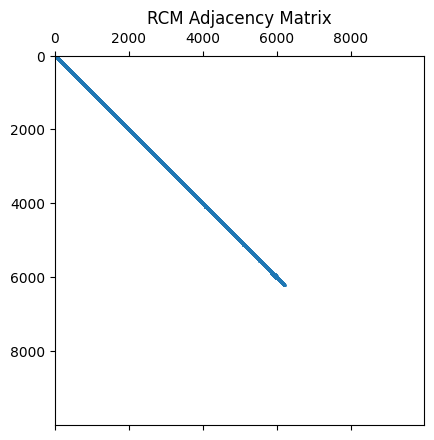

In [74]:
# def smallest_degree(G):csr_matrix = A.tocsr()
csr_matrix = A.tocsr()
rcm_ordering = csgraph.reverse_cuthill_mckee(csr_matrix)
rcm_A = A[rcm_ordering][:, rcm_ordering]

plt.title("RCM Adjacency Matrix")
plt.spy(rcm_A.todense(), markersize=1)



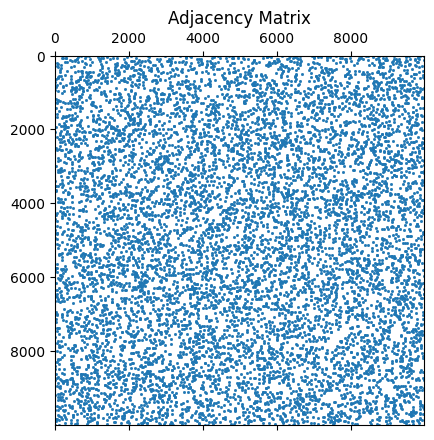

In [69]:
## Plot heatmap of adjacency matrix
plt.title("Adjacency Matrix")
plt.spy(A, markersize=1)

5028